In [50]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path 

In [51]:
results_path = Path("../results")

In [52]:
experiments = {
    'c7': ['gepard', 'whale'],
    'c5': ['gorilla', 'leon', 'monkey', 'mouse', 'rat', 'zebra'], 
}

In [53]:
dfs = []
for model in experiments:
    for exp in experiments[model]:
        dfs.append(pd.read_csv(results_path / f'{model}/{exp}/description.csv'))

In [54]:
exp_descriptions = pd.concat(dfs)

In [55]:
exp_descriptions

,app_opt_lr,app_opt_reg,camera_model,data_dir,data_factor,far_plane,global_scale,init_extent,init_num_pts,init_opa,...,refine_start_iter,refine_stop_iter,test_every,experiment,iteration,psnr,ssim,lpips,num_GS,reset_every
0,0.001,0.000001,pinhole,../data/DRON 1/c7,1,1.000000e+10,1.0,3.0,300000,0.5,...,1000,225000,8,gepard,59999,22.633921,0.719707,0.289170,3000000,NaN
0,0.001,0.000001,pinhole,../data/DRON 1/c7,1,1.000000e+10,1.0,3.0,100000,0.1,...,500,15000,8,whale,24999,20.865635,0.673556,0.368868,2706355,3000.0
0,0.001,0.000001,pinhole,data/DRON 1/c5/sparse/undistorted_images,1,1.000000e+10,1.0,3.0,300000,0.5,...,1000,225000,8,gorilla,122499,22.571005,0.713384,0.207060,3000000,NaN
0,0.001,0.000001,pinhole,../data/DRON 1/c5/sparse/undistorted_images,1,1.000000e+10,1.0,3.0,300000,0.5,...,1000,225000,8,leon,49999,22.327412,0.718626,0.302305,2044869,NaN
0,0.001,0.000001,pinhole,data/DRON 1/c5/sparse/undistorted_images,1,1.000000e+10,1.0,3.0,300000,0.5,...,1000,225000,8,monkey,89999,22.564878,0.724856,0.248403,1318145,NaN
0,0.001,0.000001,pinhole,../data/DRON 1/c5/sparse/undistorted_images,1,1.000000e+10,1.0,3.0,300000,0.1,...,500,15000,8,mouse,19999,21.984833,0.713271,0.262691,4564464,3000.0
0,0.001,0.000001,pinhole,../data/DRON 1/c5/sparse/undistorted_images,1,1.000000e+10,1.0,3.0,300000,0.5,...,500,25000,8,rat,9999,21.060947,0.675872,0.459026,1766437,NaN
0,0.001,0.000001,pinhole,../data/DRON 1/c5/sparse/undistorted_images,1,1.000000e+10,1.0,3.0,300000,0.5,...,500,25000,8,zebra,104999,22.332077,0.716428,0.331153,187245,NaN


In [56]:
def model_experiments(model_name):
    return exp_descriptions[np.isin(exp_descriptions['experiment'], experiments[model_name])]

In [57]:
c7_experiments = model_experiments('c7')

In [58]:
c7_experiments

,app_opt_lr,app_opt_reg,camera_model,data_dir,data_factor,far_plane,global_scale,init_extent,init_num_pts,init_opa,...,refine_start_iter,refine_stop_iter,test_every,experiment,iteration,psnr,ssim,lpips,num_GS,reset_every
0,0.001,0.000001,pinhole,../data/DRON 1/c7,1,1.000000e+10,1.0,3.0,300000,0.5,...,1000,225000,8,gepard,59999,22.633921,0.719707,0.289170,3000000,NaN
0,0.001,0.000001,pinhole,../data/DRON 1/c7,1,1.000000e+10,1.0,3.0,100000,0.1,...,500,15000,8,whale,24999,20.865635,0.673556,0.368868,2706355,3000.0


In [33]:
c5_experiments = model_experiments('c5')

<Axes: xlabel='experiment', ylabel='num_GS'>

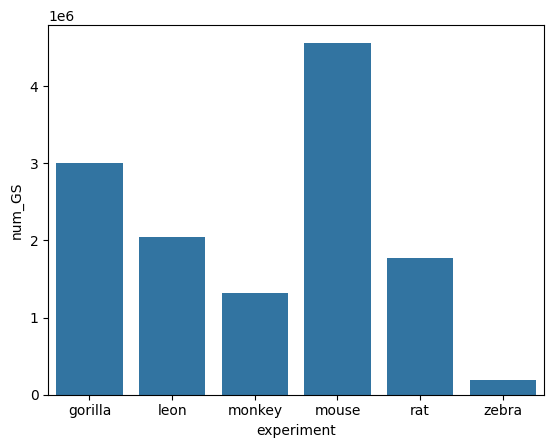

In [34]:
sns.barplot(c5_experiments, x='experiment', y='num_GS')

<Axes: title={'center': 'lpips'}, xlabel='num_GS', ylabel='lpips'>

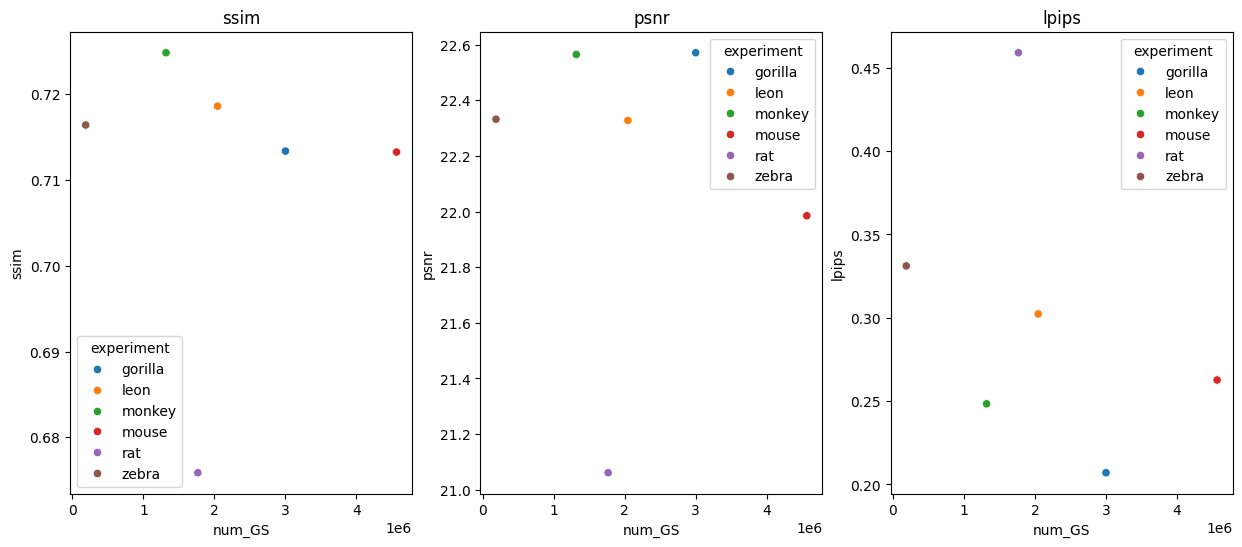

In [47]:
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
ax[0].set_title('ssim')
ax[1].set_title('psnr')
ax[2].set_title('lpips')

sns.scatterplot(c5_experiments, x='num_GS', y='ssim', hue='experiment', ax=ax[0])
sns.scatterplot(c5_experiments, x='num_GS', y='psnr', hue='experiment', ax=ax[1])
sns.scatterplot(c5_experiments, x='num_GS', y='lpips', hue='experiment', ax=ax[2])

In [49]:
c5_experiments[c5_experiments['experiment'] == 'monkey']

,app_opt_lr,app_opt_reg,camera_model,data_dir,data_factor,far_plane,global_scale,init_extent,init_num_pts,init_opa,...,refine_start_iter,refine_stop_iter,test_every,experiment,iteration,psnr,ssim,lpips,num_GS,reset_every
0,0.001,0.000001,pinhole,data/DRON 1/c5/sparse/undistorted_images,1,1.000000e+10,1.0,3.0,300000,0.5,...,1000,225000,8,monkey,89999,22.564878,0.724856,0.248403,1318145,NaN
